In [1]:
import tensorflow as tf
mnist=tf.keras.datasets.fashion_mnist
(training_images, training_labels),(test_images, test_labels)=mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255

4423680/4422102 [==============================] - 0s 0us/step


In [2]:
model=tf.keras.models.Sequential([
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                  tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images,training_labels,epochs=5)
test_loss=model.evaluate(test_images,test_labels)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4922 - accuracy: 0.8285
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3754 - accuracy: 0.8643
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3360 - accuracy: 0.8762
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3149 - accuracy: 0.8836
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3616 - accuracy: 0.8718


In [3]:
#Convolutional Neural Networks. Add some layers to do the convolution before the dense layers. Using this operations,
#the information going to the dense layers if more focussed

In [4]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

In [5]:
training_images=training_images.reshape(60000,28,28,1)
training_images=training_images/255.0
test_images=test_images.reshape(10000,28,28,1)
test_images=test_images/255.0


In [18]:
model=tf.keras.models.Sequential([
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)),
                                  tf.keras.layers.MaxPooling2D(2,2),
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPooling2D(2,2),
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(1024,activation='relu'),
                                  tf.keras.layers.Dense(10,activation='softmax')
                              
])

In [19]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 1024)              1639424   
_________________________________________________________________
dense_11 (Dense)             (None, 10)               

In [20]:
model.fit(training_images,training_labels,epochs=10)
test_loss=model.evaluate(test_images,test_labels)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4108 - accuracy: 0.8489
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2710 - accuracy: 0.8988
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2251 - accuracy: 0.9160
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1896 - accuracy: 0.9283
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1580 - accuracy: 0.9406
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1323 - accuracy: 0.9496
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1088 - accuracy: 0.9585
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0904 - accuracy: 0.9653
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0733 - accuracy: 0.9719
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.3511 

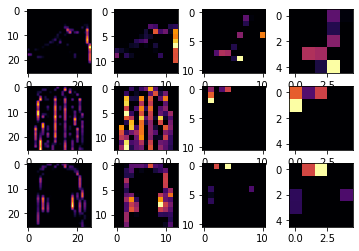

In [21]:
#Convolutions and Pooling
#First 100 labels in the test set.
import matplotlib.pyplot as plt
f, axarr=plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER=1

from tensorflow.keras import  models

layer_outputs=[layer.output for layer in model.layers]

activation_model=tf.keras.Model(inputs=model.input, outputs=layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)